In [1]:
!pip install tensorflow==2.19.0

In [3]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

model_path = "C:/Users/HP/Desktop/ML_DS/CNN/notebooks/model/best_model.h5"
image_dir = "C:/Users/HP/Desktop/ML_DS/CNN/data/oxford-iiit-pet/images/images"
annotations_file = "C:/Users/HP/Desktop/ML_DS/CNN/data/oxford-iiit-pet/annotations/annotations/list.txt"


In [4]:
data = []
with open(annotations_file, "r") as f:
    lines = f.readlines()[6:]  # skip header lines
    for line in lines:
        parts = line.strip().split()
        if len(parts) >= 2:
            filename = parts[0] + ".jpg"
            label = "_".join(parts[0].split("_")[:-1])
            full_path = os.path.join(image_dir, filename)
            if os.path.exists(full_path):
                data.append((full_path, label))

CLASS_NAMES = sorted(set(label for _, label in data))

In [5]:
model = load_model(model_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


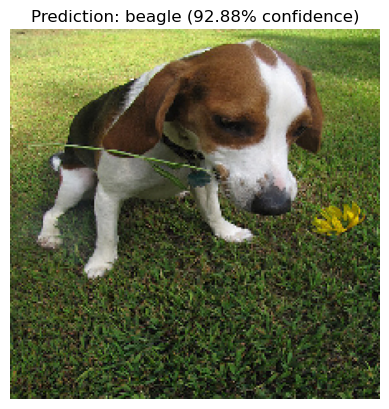

In [10]:
def predict_image(img_path, model, class_names, image_size=(224, 224)):
    img = image.load_img(img_path, target_size=image_size)
    img_array = image.img_to_array(img)
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)
    img_array = tf.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions)
    confidence = float(np.max(predictions))

    predicted_class = class_names[predicted_index]
    return predicted_class, confidence, img

test_img_path = "C:/Users/HP/Desktop/ML_DS/CNN/data/oxford-iiit-pet/images/images/beagle_99.jpg"
pred_class, conf, display_img = predict_image(test_img_path, model, CLASS_NAMES)

plt.imshow(display_img)
plt.axis('off')
plt.title(f"Prediction: {pred_class} ({conf:.2%} confidence)")
plt.show()